In [152]:
import pandas as pd
import missingno as msno

In [101]:
df = pd.read_parquet('../do_not_commit/Datasets/Persist_System_DISC.pq')


# days_since_creation


In [102]:
# The number of days since the machine was created.
# This feature can be created from the Creation_Date0 field from system_DISC.

In [103]:
days_since_creation = df.groupby(['Name0', 'RWB_EFFECTIVE_DATE'])['Creation_Date0'].agg('max').reset_index()

In [104]:
days_since_creation['RWB_EFFECTIVE_DATE'] = pd.to_datetime(days_since_creation['RWB_EFFECTIVE_DATE']).dt.date
days_since_creation['Creation_Date0'] = pd.to_datetime(days_since_creation['Creation_Date0'])

In [105]:
days_since_creation['Creation_Date0_Days'] = days_since_creation['Creation_Date0'].apply(lambda x: x.date())
days_since_creation['Days Since Creation'] = days_since_creation['RWB_EFFECTIVE_DATE'] - days_since_creation['Creation_Date0_Days']

In [106]:
# days_since_creation.drop(columns='Creation_Date0', inplace=True)
days_since_creation['Days Since Creation'] = days_since_creation['Days Since Creation'].apply(lambda x: x.days)
days_since_creation

,Name0,RWB_EFFECTIVE_DATE,Creation_Date0,Creation_Date0_Days,Days Since Creation
0,ABE-D-U13721,2022-08-30,2022-03-02 16:50:14,2022-03-02,181
1,ABE-D-U13721,2022-08-31,2022-03-02 16:50:14,2022-03-02,182
2,ABE-D-U13721,2022-09-01,2022-03-02 16:50:14,2022-03-02,183
3,ABE-D-U13721,2022-09-02,2022-03-02 16:50:14,2022-03-02,184
4,ABE-D-U13721,2022-09-03,2022-03-02 16:50:14,2022-03-02,185
...,...,...,...,...,...
1039229,mit-l-u21630,2023-05-16,2023-05-01 14:05:04,2023-05-01,15
1039230,mit-l-u21630,2023-05-17,2023-05-01 14:05:04,2023-05-01,16
1039231,mit-l-u21630,2023-05-18,2023-05-01 14:05:04,2023-05-01,17
1039232,mit-l-u21630,2023-05-19,2023-05-01 14:05:04,2023-05-01,18


In [107]:
# is_virtual_machine
# Identifies if the machine is a virtual machine or not.
# This can be pulled directly from the Is_Virtual_Macihine0.

# is_client
# Identifies if the machine is a SCCM client or not.
# This can be pulled directly from the Client0 attribute in Persist.System_DISC.

# is_active
# Identifies if the machine is active or not.
# This can be pulled directly from the Active0 attribute in Persist.System_DISC.

In [125]:
features = df.groupby(['Name0', 'RWB_EFFECTIVE_DATE']).agg(
    {
        'Is_Virtual_Machine0':'max',
        'Client0':'max',
        'Active0':'max'
    }
).reset_index()
features

,Name0,RWB_EFFECTIVE_DATE,Is_Virtual_Machine0,Client0,Active0
0,ABE-D-U13721,2022-08-30,0.0,1.0,1.0
1,ABE-D-U13721,2022-08-31,0.0,1.0,1.0
2,ABE-D-U13721,2022-09-01,0.0,1.0,1.0
3,ABE-D-U13721,2022-09-02,0.0,1.0,1.0
4,ABE-D-U13721,2022-09-03,0.0,1.0,1.0
...,...,...,...,...,...
1039229,mit-l-u21630,2023-05-16,NaN,NaN,NaN
1039230,mit-l-u21630,2023-05-17,NaN,NaN,NaN
1039231,mit-l-u21630,2023-05-18,NaN,NaN,NaN
1039232,mit-l-u21630,2023-05-19,NaN,NaN,NaN



# last_logon_date_age


In [0]:
# Number of days since a user has logged onto the machine.
# Calculate using the Last_Logon_Timestamp0 attribute from Persist.System_DISC
df['Last_Logon_Timestamp0'] = pd.to_datetime(df['Last_Logon_Timestamp0'])
days_since_last_logon = df.groupby(['Name0', 'RWB_EFFECTIVE_DATE'])['Last_Logon_Timestamp0'].agg('max').reset_index()

In [0]:
days_since_last_logon['RWB_EFFECTIVE_DATE'] = pd.to_datetime(days_since_last_logon['RWB_EFFECTIVE_DATE']).dt.date
days_since_last_logon['Last_Logon_Timestamp0_Date'] = days_since_last_logon['Last_Logon_Timestamp0'].apply(lambda x: x.date())

In [98]:
days_since_last_logon['Days Since Last Logon'] = days_since_last_logon['RWB_EFFECTIVE_DATE'] - days_since_last_logon['Last_Logon_Timestamp0_Date']
days_since_last_logon['Days Since Last Logon'] = days_since_last_logon['Days Since Last Logon'].apply(lambda x: x.days)
days_since_last_logon

In [150]:
days_since_creation['RWB_EFFECTIVE_DATE'] = days_since_creation['RWB_EFFECTIVE_DATE'].astype('str')
days_since_last_logon['RWB_EFFECTIVE_DATE'] = days_since_last_logon['RWB_EFFECTIVE_DATE'].astype('str')


# Join them together.


In [151]:
combined = features.merge(days_since_creation[['Name0', 'RWB_EFFECTIVE_DATE', 'Days Since Creation']], on=['Name0', 'RWB_EFFECTIVE_DATE'])
combined = combined.merge(days_since_last_logon[['Name0', 'RWB_EFFECTIVE_DATE', 'Days Since Last Logon']], on=['Name0', 'RWB_EFFECTIVE_DATE'])
combined

,Name0,RWB_EFFECTIVE_DATE,Is_Virtual_Machine0,Client0,Active0,Days Since Creation,Days Since Last Logon
0,ABE-D-U13721,2022-08-30,0.0,1.0,1.0,181,NaN
1,ABE-D-U13721,2022-08-31,0.0,1.0,1.0,182,NaN
2,ABE-D-U13721,2022-09-01,0.0,1.0,1.0,183,NaN
3,ABE-D-U13721,2022-09-02,0.0,1.0,1.0,184,NaN
4,ABE-D-U13721,2022-09-03,0.0,1.0,1.0,185,NaN
...,...,...,...,...,...,...,...
1039229,mit-l-u21630,2023-05-16,NaN,NaN,NaN,15,4.0
1039230,mit-l-u21630,2023-05-17,NaN,NaN,NaN,16,5.0
1039231,mit-l-u21630,2023-05-18,NaN,NaN,NaN,17,6.0
1039232,mit-l-u21630,2023-05-19,NaN,NaN,NaN,18,7.0


<AxesSubplot:>

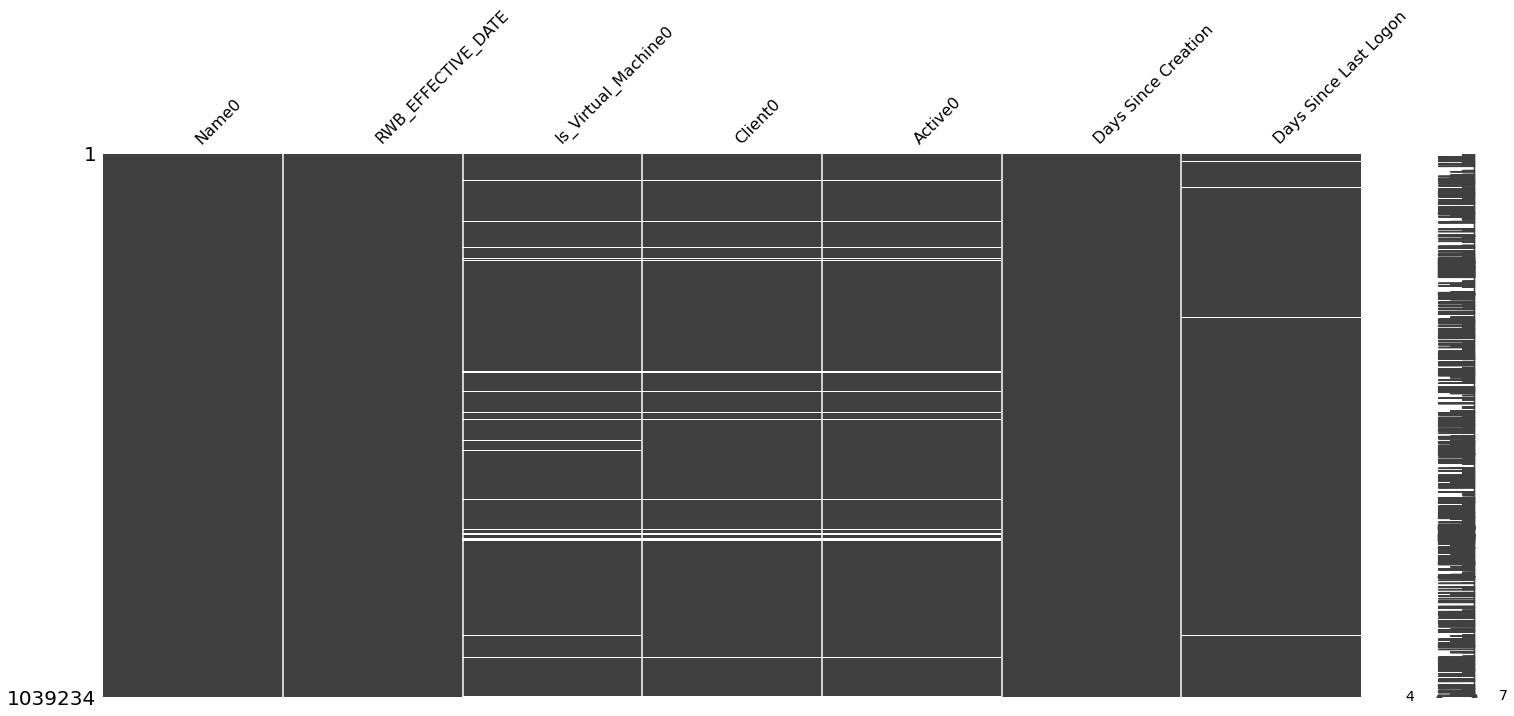

In [153]:
msno.matrix(combined)

In [154]:
combined.to_parquet('../do_not_commit/FeatureDatasets/system_disc_features.pq')